La largeur du faiceau est de 3.10 mm


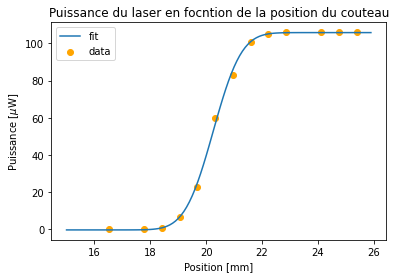

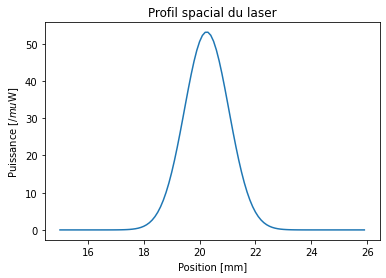

In [2]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.special import erf
from scipy.misc import derivative
from math import exp
import numpy
from matplotlib import pyplot

def varerf(x, a, b, c, d):
    """
    This function returns an ERF.
    """
    return a*erf(x*b - c) + d

data = np.genfromtxt('Mesure.csv',delimiter=';')
data = data[1:-1] # On retire la première ligne (nom des colomnes)
x = data[:,1] # On sélectionne la colomne postion en mm
y = data[:,2]# On sélectionne la colomne puissance en uW

###############################################
""" Variables importantes"""
# 
start = 15
end = 26
step = 0.1

a = 50
b = 1
c = 20
d = 50
###############################################

# On fit les données sur une erf
popt, pcov = curve_fit(varerf, x, y,[a,b,c,d])


# On calcule et trace l'erf
pos = numpy.arange(start,end,step)
val = varerf(pos, popt[0], popt[1],popt[2],popt[3])
pyplot.figure()
pyplot.plot(pos,val, label="fit")
pyplot.scatter(x,y,color='orange',label="data")
pyplot.xlabel("Position [mm]")
pyplot.ylabel("Puissance [$\mu$W]")
pyplot.title("Puissance du laser en focntion de la position du couteau")
pyplot.legend()
pyplot.savefig("Mesure", bbox_inches='tight', dpi=300)

# On calule la dérivé de l'erf et on l'affiche
pulse = derivative(varerf, pos, dx=1e-6, args = [popt[0], popt[1],popt[2],popt[3]])
pyplot.figure()
pyplot.plot(pos,pulse)
pyplot.title("Profil spacial du laser")
pyplot.xlabel("Position [mm]")
pyplot.ylabel("Puissance [$/mu$W]")
pyplot.savefig("profil", dpi=300)

#On calcule la lageur du faicseau à 1/e**2
pulse = (pulse - numpy.min(pulse))/ (numpy.max(pulse) - numpy.min(pulse))
lower = np.where(pulse >= 1/(exp(1)**2))[0][0] * step + 15
upper = np.where(pulse >= 1/(exp(1)**2))[0][-1] * step + 15
print("La largeur du faiceau est de",'%.2f'%(upper - lower),"mm")
